In [216]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')

## Order Data

In [217]:
# Loading the Order Data from the csv file
order_data = pd.read_csv('Data_Files/order_data.csv')

In [218]:
order_data.shape

(500, 12)

In [219]:
order_data.head()

,id_order,id_store,id_table,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price
0,112572333,7786,NaN,24920.0,14854.0,12/01/2020 16:03:02,12/01/2020 16:03:13,CLOSED,tiller-order,1,11.9,11.9
1,112912195,6830,133612.0,12894.0,13026.0,14/01/2020 22:06:18,14/01/2020 22:08:10,CLOSED,Tiller iPAD,4,61.1,61.1
2,113129706,8291,NaN,16823.0,15760.0,16/01/2020 11:11:02,16/01/2020 11:11:30,CLOSED,tiller-order,1,11.7,11.7
3,79969209,351,19300.0,461.0,128.0,29/06/2019 17:03:54,29/06/2019 18:22:21,CLOSED,Tiller iPAD,4,128.0,128.0
4,49208645,6008,NaN,10990.0,11065.0,16/11/2018 16:43:54,16/11/2018 16:56:15,CLOSED,Tiller iPAD,1,9.9,9.9


In [220]:
order_data.dtypes

id_order            int64
id_store            int64
id_table          float64
id_waiter         float64
id_device         float64
date_opened        object
date_closed        object
dim_status         object
dim_source         object
m_nb_customer       int64
m_cached_payed    float64
m_cached_price    float64
dtype: object

In [221]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_order        500 non-null    int64  
 1   id_store        500 non-null    int64  
 2   id_table        278 non-null    float64
 3   id_waiter       490 non-null    float64
 4   id_device       477 non-null    float64
 5   date_opened     500 non-null    object 
 6   date_closed     500 non-null    object 
 7   dim_status      500 non-null    object 
 8   dim_source      411 non-null    object 
 9   m_nb_customer   500 non-null    int64  
 10  m_cached_payed  500 non-null    float64
 11  m_cached_price  500 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 47.0+ KB


In [222]:
order_data[['id_order','id_store']] = order_data[['id_order','id_store']].astype(str)

In [223]:
# order_data[['id_table', 'id_waiter', 'id_device']] = order_data[['id_table', 'id_waiter', 'id_device']].astype(str)

In [224]:
order_data['date_opened'] = pd.to_datetime(order_data['date_opened'], format= "%d/%m/%Y %H:%M:%S")
order_data['date_closed'] = pd.to_datetime(order_data['date_closed'], format= "%d/%m/%Y %H:%M:%S")

In [225]:
# Total number of missing values
order_data.isnull().sum()

id_order            0
id_store            0
id_table          222
id_waiter          10
id_device          23
date_opened         0
date_closed         0
dim_status          0
dim_source         89
m_nb_customer       0
m_cached_payed      0
m_cached_price      0
dtype: int64

In [226]:
order_data.isnull().sum()/len(order_data)*100

id_order           0.0
id_store           0.0
id_table          44.4
id_waiter          2.0
id_device          4.6
date_opened        0.0
date_closed        0.0
dim_status         0.0
dim_source        17.8
m_nb_customer      0.0
m_cached_payed     0.0
m_cached_price     0.0
dtype: float64

<Axes: >

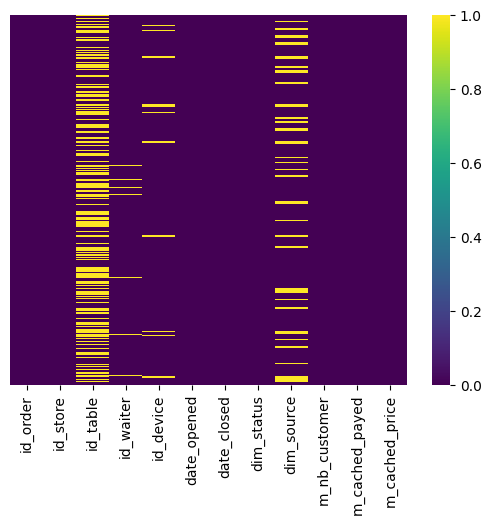

In [227]:
sns.heatmap(order_data.isnull() , yticklabels= False , cbar= True , cmap="viridis" )

Since the id_table has around 45% data missing, so we can drop this column.

In [228]:
order_data.drop(columns = "id_table" , inplace = True)

In [229]:
order_data[order_data['id_waiter'].isnull()]

,id_order,id_store,id_waiter,id_device,date_opened,date_closed,dim_status,dim_source,m_nb_customer,m_cached_payed,m_cached_price
203,67419062,7872,NaN,15009.0,2019-04-09 21:36:21,2019-04-09 21:36:54,CLOSED,Tiller iPAD,1,30.0,30.0
222,88964143,7872,NaN,15009.0,2019-08-24 20:53:07,2019-08-24 20:53:26,CLOSED,Tiller iPAD,1,25.0,25.0
233,50639223,8291,NaN,15747.0,2018-11-29 12:10:01,2018-11-29 16:18:34,CLOSED,Tiller iPAD,1,8.9,8.9
242,52200722,8291,NaN,15747.0,2018-12-10 11:18:16,2018-12-10 11:18:41,CLOSED,Tiller iPAD,1,8.9,8.9
355,49170536,8291,NaN,15747.0,2018-11-16 12:22:02,2018-11-16 12:22:24,CLOSED,Tiller iPAD,1,10.9,10.9
377,97051495,7872,NaN,15009.0,2019-10-09 17:37:27,2019-10-09 17:37:35,CLOSED,Tiller iPAD,1,45.0,45.0
420,113439250,7872,NaN,15009.0,2020-01-17 18:55:52,2020-01-17 18:55:58,CLOSED,Tiller iPAD,1,25.0,25.0
432,95632856,7872,NaN,15009.0,2019-10-01 20:59:24,2019-10-01 21:00:02,CLOSED,Tiller iPAD,1,30.0,30.0
473,86371443,7872,NaN,15009.0,2019-08-06 19:10:37,2019-08-06 20:04:22,CLOSED,Tiller iPAD,1,55.0,55.0
487,50386223,8291,NaN,15747.0,2018-11-27 11:28:03,2018-11-27 15:08:35,CLOSED,Tiller iPAD,1,20.8,20.8


In [230]:
order_data['id_waiter'].nunique()

38

In [231]:
order_data['id_waiter'].value_counts()

id_waiter
16823.0    55
2464.0     54
461.0      37
14302.0    35
2752.0     32
1095.0     27
472.0      25
2753.0     25
12894.0    18
9270.0     18
10990.0    13
15509.0    12
7225.0     12
8257.0     12
13318.0    11
10411.0    11
17650.0     9
9137.0      9
10627.0     8
10991.0     8
14172.0     7
7185.0      6
22355.0     6
9665.0      5
10977.0     5
6693.0      4
26319.0     4
25560.0     4
10628.0     3
15756.0     2
972.0       2
25250.0     2
17052.0     2
20061.0     2
11211.0     2
24920.0     1
8303.0      1
12873.0     1
Name: count, dtype: int64

Since the waiter id is under 2% and 10 in total number, so we can replace it with mode. 

In [232]:
waiter_mode = order_data['id_waiter'].mode() [0]
waiter_mode

16823.0

In [233]:
order_data['id_waiter'].fillna(waiter_mode, inplace = True )

In [234]:
order_data['id_device'].nunique()

30

In [235]:
order_data['id_device'].value_counts()

id_device
424.0      47
15747.0    44
13022.0    38
5949.0     32
128.0      29
9251.0     27
129.0      25
13026.0    21
11065.0    20
15760.0    19
10214.0    18
3063.0     18
6780.0     17
754.0      16
6153.0     15
14854.0    13
8270.0     13
10625.0    11
13929.0    10
15758.0     9
15009.0     8
755.0       6
716.0       5
10064.0     5
13930.0     3
3064.0      2
11020.0     2
25379.0     2
757.0       1
7011.0      1
Name: count, dtype: int64

Since the id device is 23 in total number, which one of top entries of data, so we can't replace it with the mode rather remove all the indexes where id device is null.

In [236]:
device_drop_index = order_data[order_data['id_device'].isnull()].index
device_drop_index

Index([ 14,  20,  56,  57, 120, 121, 122, 123, 131, 171, 172, 236, 298, 299,
       358, 427, 428, 431, 433, 488, 489, 490, 492],
      dtype='int64')

In [237]:
order_data.drop(index= device_drop_index, inplace=True, axis=0)

In [238]:
order_data['dim_source'].value_counts()

dim_source
Tiller iPAD     329
tiller-order     78
Name: count, dtype: int64

In [239]:
order_data['dim_source'].value_counts()/len(order_data)*100

dim_source
Tiller iPAD     68.972746
tiller-order    16.352201
Name: count, dtype: float64

Since the difference between Tiller iPAD and Tiller Order is very much, so we will fill the missing values with higher weightage of Tiller iPAD

In [240]:
order_data['dim_source'].fillna('Tiller iPAD', axis = 0, inplace = True)

In [241]:
# To standardrize the entries of data in dim_source column
order_data['dim_source'].replace('tiller-order' , 'Tiller order' , inplace = True)

In [242]:
order_data.isnull().sum()

id_order          0
id_store          0
id_waiter         0
id_device         0
date_opened       0
date_closed       0
dim_status        0
dim_source        0
m_nb_customer     0
m_cached_payed    0
m_cached_price    0
dtype: int64

In [243]:
# Exporting the Cleaned Order Data Set to csv
order_data.to_csv('Order_data_Cleaned.csv', index=False)

## Order Line

In [244]:
# Loading the Order Data from the csv file
order_line = pd.read_csv('Data_Files/order_line.csv')

In [245]:
order_line.shape

(500, 20)

In [246]:
order_line.head()

,id_order_line,id_order,date_opended,date_created,m_quantity,m_unit_price,m_unit_price_exc_vat,m_total_price_inc_vat,m_total_price_exc_vat,m_tax_percent,m_discount_amount,dim_type,dim_category,dim_name,dim_status,dim_feature_type,dim_unit_measure,dim_unit_measure_display,dim_category_translated,dim_name_translated
0,36303668,7901432,29/04/2017 20:38:13,29/04/2017 20:38:13,1,0,0,0,0,0.2,0,OPTION,Martini 15 cl,Gin,WAITING,NaN,NaN,NaN,Martini 15 cl,Gin
1,160656467,35669117,18/07/2018 12:55:12,18/07/2018 13:09:03,1,0,0,0,0,0.1,0,PRODUCT,WRAP DE SARRASIN,NYC,WAITING,NaN,NaN,NaN,BUCKWHEAT WRAP,NYC
2,127895661,27274572,27/04/2018 10:44:45,27/04/2018 10:49:04,1,0,0,0,0,0.1,0,PRODUCT,BREIZH'N'ROLL,NYC,IN_PROGRESS,NaN,NaN,NaN,BREIZH&#39;N&#39;ROLL,NYC
3,124934060,26512568,19/04/2018 10:35:06,19/04/2018 10:35:20,1,0,0,0,0,0.1,0,PRODUCT,BREIZH'N'ROLL,NYC,IN_PROGRESS,NaN,NaN,NaN,BREIZH&#39;N&#39;ROLL,NYC
4,83606925,16715607,24/11/2017 12:35:38,24/11/2017 12:36:19,1,0,0,0,0,0.1,0,PRODUCT,BREIZH'N'ROLL,NYC,IN_PROGRESS,NaN,NaN,NaN,BREIZH&#39;N&#39;ROLL,NYC


In [247]:
order_line.dtypes

id_order_line                 int64
id_order                      int64
date_opended                 object
date_created                 object
m_quantity                    int64
m_unit_price                  int64
m_unit_price_exc_vat          int64
m_total_price_inc_vat         int64
m_total_price_exc_vat         int64
m_tax_percent               float64
m_discount_amount             int64
dim_type                     object
dim_category                 object
dim_name                     object
dim_status                   object
dim_feature_type             object
dim_unit_measure             object
dim_unit_measure_display     object
dim_category_translated      object
dim_name_translated          object
dtype: object

In [248]:
order_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_order_line             500 non-null    int64  
 1   id_order                  500 non-null    int64  
 2   date_opended              500 non-null    object 
 3   date_created              500 non-null    object 
 4   m_quantity                500 non-null    int64  
 5   m_unit_price              500 non-null    int64  
 6   m_unit_price_exc_vat      500 non-null    int64  
 7   m_total_price_inc_vat     500 non-null    int64  
 8   m_total_price_exc_vat     500 non-null    int64  
 9   m_tax_percent             500 non-null    float64
 10  m_discount_amount         500 non-null    int64  
 11  dim_type                  500 non-null    object 
 12  dim_category              500 non-null    object 
 13  dim_name                  500 non-null    object 
 14  dim_status

In [249]:
order_line[['id_order_line','id_order']] = order_line[['id_order_line','id_order']].astype(str)

In [250]:
order_line['date_opended'] = pd.to_datetime(order_line['date_opended'], format= "%d/%m/%Y %H:%M:%S")
order_line['date_created'] = pd.to_datetime(order_line['date_created'], format= "%d/%m/%Y %H:%M:%S")

In [251]:
# Total number of missing values
order_line.isnull().sum()

id_order_line                 0
id_order                      0
date_opended                  0
date_created                  0
m_quantity                    0
m_unit_price                  0
m_unit_price_exc_vat          0
m_total_price_inc_vat         0
m_total_price_exc_vat         0
m_tax_percent                 0
m_discount_amount             0
dim_type                      0
dim_category                  0
dim_name                      0
dim_status                    0
dim_feature_type            497
dim_unit_measure            427
dim_unit_measure_display    427
dim_category_translated       0
dim_name_translated           0
dtype: int64

In [252]:
# Total percentage of missing values
order_line.isnull().sum()/len(order_line)*100

id_order_line                0.0
id_order                     0.0
date_opended                 0.0
date_created                 0.0
m_quantity                   0.0
m_unit_price                 0.0
m_unit_price_exc_vat         0.0
m_total_price_inc_vat        0.0
m_total_price_exc_vat        0.0
m_tax_percent                0.0
m_discount_amount            0.0
dim_type                     0.0
dim_category                 0.0
dim_name                     0.0
dim_status                   0.0
dim_feature_type            99.4
dim_unit_measure            85.4
dim_unit_measure_display    85.4
dim_category_translated      0.0
dim_name_translated          0.0
dtype: float64

In [253]:
order_line.drop( columns=["dim_feature_type","dim_unit_measure","dim_unit_measure_display"] , inplace = True)

In [254]:
order_line.isnull().sum()

id_order_line              0
id_order                   0
date_opended               0
date_created               0
m_quantity                 0
m_unit_price               0
m_unit_price_exc_vat       0
m_total_price_inc_vat      0
m_total_price_exc_vat      0
m_tax_percent              0
m_discount_amount          0
dim_type                   0
dim_category               0
dim_name                   0
dim_status                 0
dim_category_translated    0
dim_name_translated        0
dtype: int64

In [255]:
# To standardrize the entries of data in dim_category column
order_line['dim_category'].replace('Cuisson' , 'Cuissons' , inplace = True)

In [256]:
# To standardrize the entries of data in dim_category_translated column
order_line['dim_category_translated'].replace('COOKINGS' , 'cooking' , inplace = True)

In [257]:
# Exporting the Order line Set to csv
order_line.to_csv('Order_line_Cleaned.csv', index=False)

## Payment Data

In [258]:
# Loading the Order Data from the csv file
payment = pd.read_csv('Data_Files/payment_data.csv')

In [259]:
payment.shape

(500, 8)

In [260]:
payment.head()

,id_pay,id_order,dim_status,dim_type,m_amount,m_cashback,m_credit,date_created
0,51132874,37856999,ACCEPTED,CB_Sans_Contact,16.1,0,0,08/08/2018 12:17:22
1,29021533,20355020,ACCEPTED,CB_Sans_Contact,13.9,0,0,31/01/2018 12:49:26
2,180172825,143751020,ACCEPTED,CB_SANS_CONTACT,25.3,0,0,23/09/2020 12:51:19
3,114043888,88950069,ACCEPTED,AMERICAN_EXPRESS,75.6,0,0,24/08/2019 19:31:05
4,32433714,22894007,ACCEPTED,BANK_TRANSFER,66.0,0,0,08/03/2018 14:00:10


In [261]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_pay        500 non-null    int64  
 1   id_order      500 non-null    int64  
 2   dim_status    500 non-null    object 
 3   dim_type      500 non-null    object 
 4   m_amount      500 non-null    float64
 5   m_cashback    500 non-null    int64  
 6   m_credit      500 non-null    int64  
 7   date_created  500 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [262]:
payment.dtypes

id_pay            int64
id_order          int64
dim_status       object
dim_type         object
m_amount        float64
m_cashback        int64
m_credit          int64
date_created     object
dtype: object

In [263]:
payment[['id_pay','id_order']] = payment[['id_pay','id_order']].astype(str)

In [264]:
payment['date_created'] = pd.to_datetime(payment['date_created'], format= "%d/%m/%Y %H:%M:%S")

In [265]:
# To standardrize the entries of data in dim_type column
payment['dim_type'].replace('CB_Sans_Contact' , 'CB_SANS_CONTACT' , inplace = True)

In [266]:
payment['m_cashback'].nunique()

1

In [267]:
payment['m_cashback'].value_counts()

m_cashback
0    500
Name: count, dtype: int64

In [268]:
payment['m_credit'].nunique()

1

In [269]:
payment.drop( columns=["m_credit","m_cashback"] , inplace = True)

In [270]:
# Total number of missing values
payment.isnull().sum()

id_pay          0
id_order        0
dim_status      0
dim_type        0
m_amount        0
date_created    0
dtype: int64

In [271]:
# Exporting the paymentSet to csv
payment.to_csv('payment_Cleaned.csv', index=False)

## Store Data

In [272]:
# Loading the store Data from the csv file
store = pd.read_csv('Data_Files/store_data.csv')

In [273]:
store.shape

(21, 5)

In [274]:
store.head(21)

,id_store,date_created,dim_zipcode,dim_country,dim_currency
0,360,29/07/2015 06:54:50,75001,FR,EUR
1,351,25/07/2015 11:51:52,75002,FR,EUR
2,4803,04/10/2017 13:56:31,75002,FR,EUR
3,4364,27/06/2017 12:27:31,75003,FR,EUR
4,5281,08/12/2017 11:09:59,75004,FR,EUR
5,7872,25/09/2018 16:04:17,75005,FR,EUR
6,8291,12/11/2018 08:28:37,75008,FR,EUR
7,7304,08/07/2018 15:21:37,75008,FR,EUR
8,6827,11/05/2018 10:08:10,75009,FR,EUR
9,5498,29/12/2017 16:14:24,75009,FR,EUR


In [275]:
store.dtypes

id_store         int64
date_created    object
dim_zipcode      int64
dim_country     object
dim_currency    object
dtype: object

In [276]:
store['id_store'] = store['id_store'].astype(str)

In [277]:
store['date_created'] = pd.to_datetime(store['date_created'], format= "%d/%m/%Y %H:%M:%S")

In [278]:
# Total number of missing values
store.isnull().sum()

id_store        0
date_created    0
dim_zipcode     0
dim_country     0
dim_currency    0
dtype: int64

In [279]:
# Exporting the paymentSet to csv
store.to_csv('store_data.csv', index=False)